In [ ]:
# Import libraries
import os

# Libraries for the Neural Networks
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, utils
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# The dataset
from keras.datasets import cifar10


In [2]:
# Set random seed for reproducibility
np.random.seed(309)


=== Loading CIFAR-10 Dataset ===
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


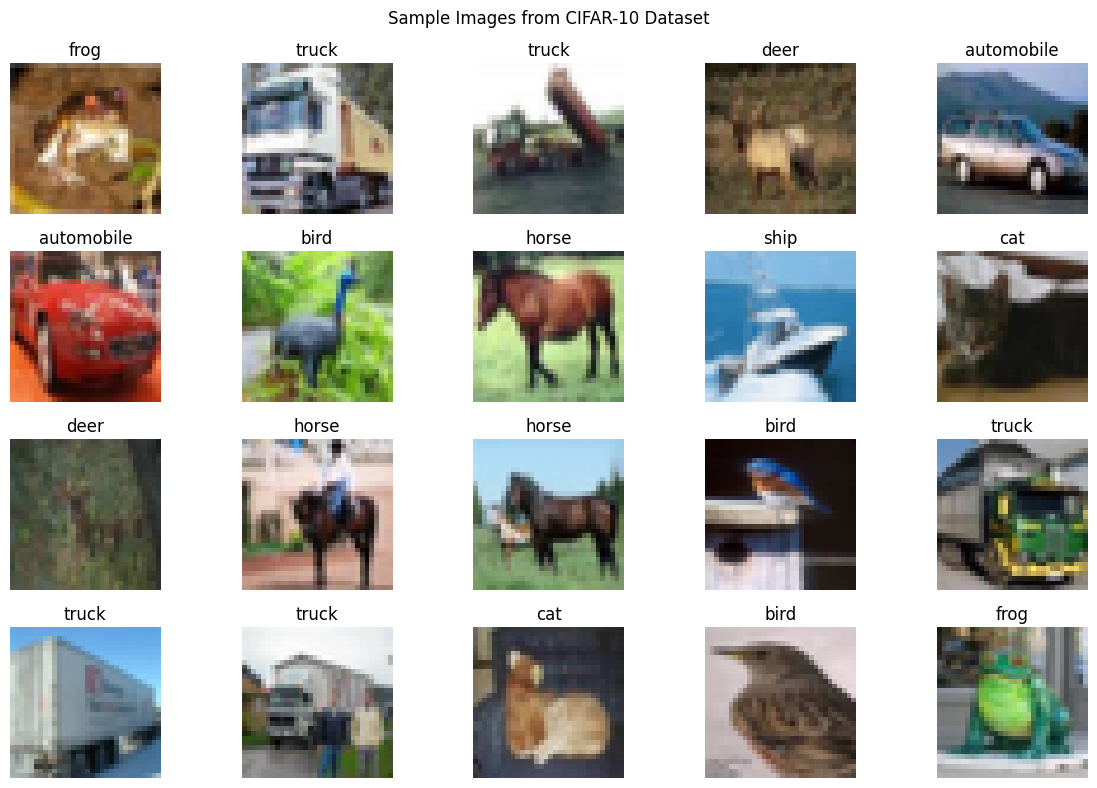

In [3]:
print("\n=== Loading CIFAR-10 Dataset ===")

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

# Display sample images
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"{class_names[y_train[i][0]]}")
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.tight_layout()
plt.show()

In [4]:
print("\n=== Data Preprocessing ===")

# Normalize pixel values to [0, 1] for faster convergence
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"Normalized training data range: [{x_train.min():.2f}, {x_train.max():.2f}]")
print(f"One-hot encoded labels shape: {y_train_cat.shape}")


=== Data Preprocessing ===
Normalized training data range: [0.00, 1.00]
One-hot encoded labels shape: (50000, 10)


In [ ]:
print("\n=== Building CNN Model ===")

def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """
    Create a CNN model for CIFAR-10 classification
    """
    model = keras.Sequential([
        # Input layer
        keras.Input(shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # # Second Convolutional Block
        # layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        # layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),

        # # Third Convolutional Block
        # layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        # layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        # layers.MaxPooling2D((2, 2)),
        # layers.Dropout(0.25),

        # Global Average Pooling instead of Flatten to reduce parameters
        layers.GlobalAveragePooling2D(),

        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model



=== Building CNN Model ===


In [6]:
# Create the model
model = create_cnn_model()

# Display model architecture
model.summary()

print("\n=== Compiling Model ===")

# Compile the model with the correct top-k accuracy metric
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,346 (134.16 KB)

 Trainable params: 33,258 (129.91 KB)

 Non-trainable params: 1,088 (4.25 KB)


=== Compiling Model ===


In [7]:
print("\n=== Setting up Callbacks ===")

# Callbacks for training
callbacks = [
    # Early stopping
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # Learning rate reduction
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),

    # Model checkpoint
    keras.callbacks.ModelCheckpoint(
        'best_cifar10_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]



=== Setting up Callbacks ===


In [ ]:
print("\n=== Training Model ===")

# Train the model
history = model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=3,
    validation_data=(x_test, y_test_cat),
    callbacks=callbacks,
    verbose=1
)


=== Training Model ===
Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3469 - loss: 1.8181 - top_3_accuracy: 0.6951
Epoch 1: val_accuracy improved from -inf to 0.45790, saving model to best_cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3469 - loss: 1.8180 - top_3_accuracy: 0.6952 - val_accuracy: 0.4579 - val_loss: 1.5490 - val_top_3_accuracy: 0.7669 - learning_rate: 0.0010
Epoch 2/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4935 - loss: 1.4018 - top_3_accuracy: 0.8232
Epoch 2: val_accuracy did not improve from 0.45790
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4935 - loss: 1.4017 - top_3_accuracy: 0.8232 - val_accuracy: 0.4532 - val_loss: 1.5102 - val_top_3_accuracy: 0.7934 - learning_rate: 0.0010
Epoch 3/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5308 - loss: 1.3113 - top_3_accuracy: 0.8459
Epoch 3: val_accuracy improved from 0.45790 to 0.48130, saving model to best_cifar10_model.


=== Plotting Training History ===


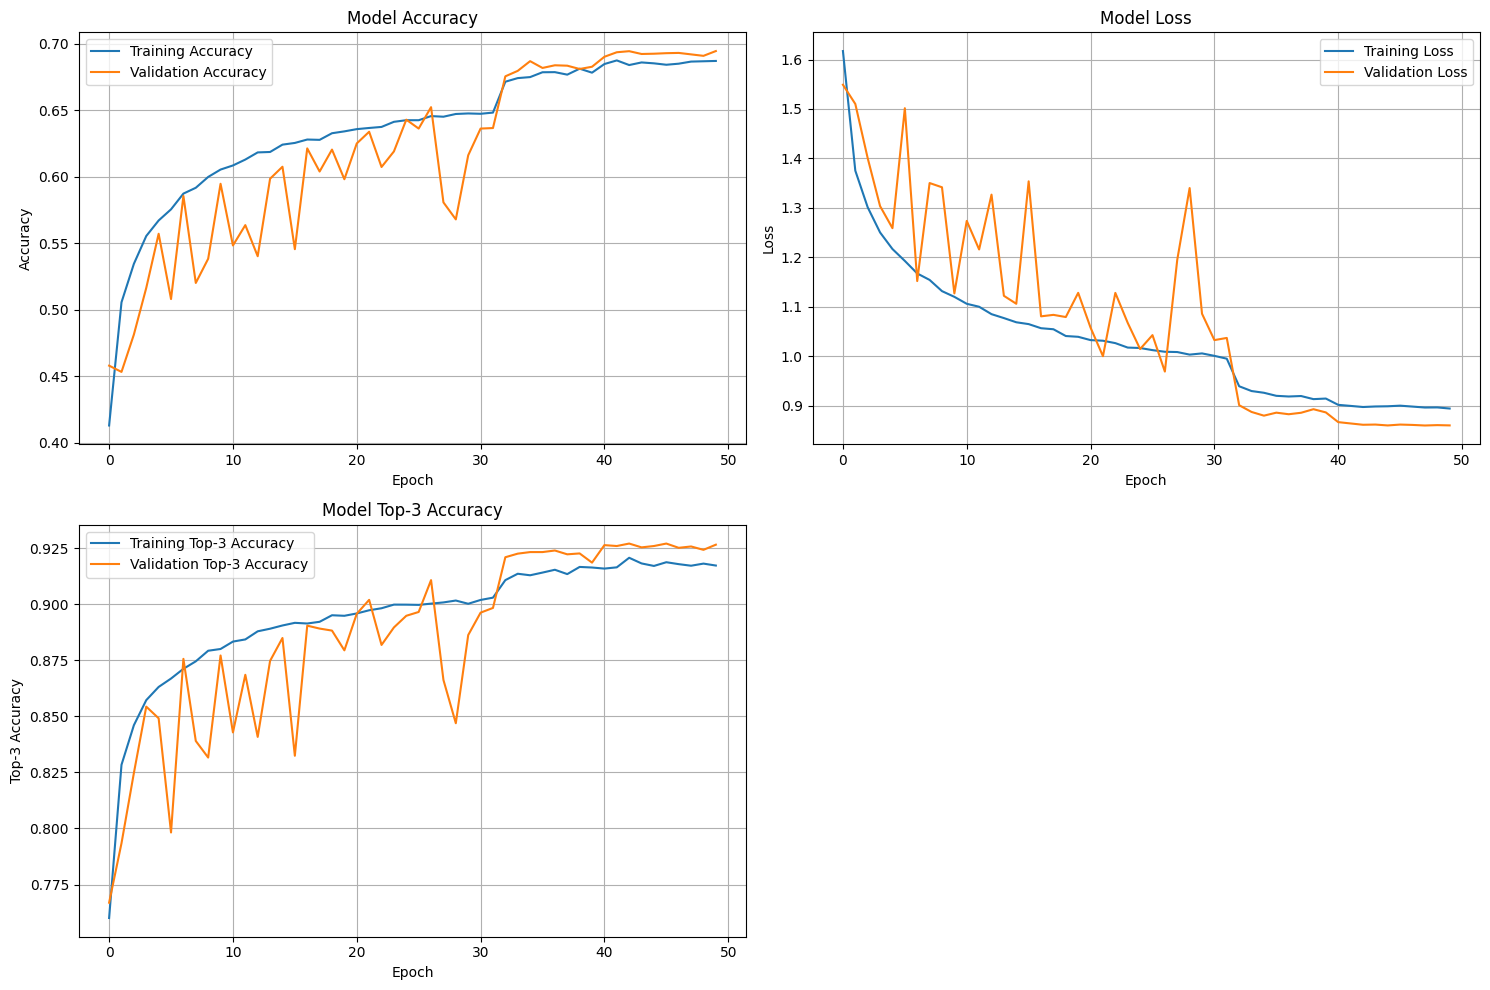

In [9]:
print("\n=== Plotting Training History ===")

def plot_training_history(history):
    """Plot training and validation metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Plot loss
    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Plot top-3 accuracy
    axes[1, 0].plot(history.history['top_3_accuracy'], label='Training Top-3 Accuracy')
    axes[1, 0].plot(history.history['val_top_3_accuracy'], label='Validation Top-3 Accuracy')
    axes[1, 0].set_title('Model Top-3 Accuracy')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Top-3 Accuracy')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Plot learning rate (if available)
    if 'lr' in history.history:
        axes[1, 1].plot(history.history['lr'], label='Learning Rate')
        axes[1, 1].set_title('Learning Rate')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_yscale('log')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
    else:
        axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


=== Evaluating Model ===
Test Loss: 0.8599
Test Accuracy: 0.6945
Test Top-3 Accuracy: 0.9265

=== Classification Report ===
              precision    recall  f1-score   support

    airplane       0.72      0.71      0.72      1000
  automobile       0.80      0.83      0.81      1000
        bird       0.60      0.55      0.57      1000
         cat       0.54      0.46      0.50      1000
        deer       0.65      0.64      0.64      1000
         dog       0.61      0.65      0.63      1000
        frog       0.71      0.78      0.74      1000
       horse       0.72      0.74      0.73      1000
        ship       0.80      0.79      0.80      1000
       truck       0.78      0.81      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



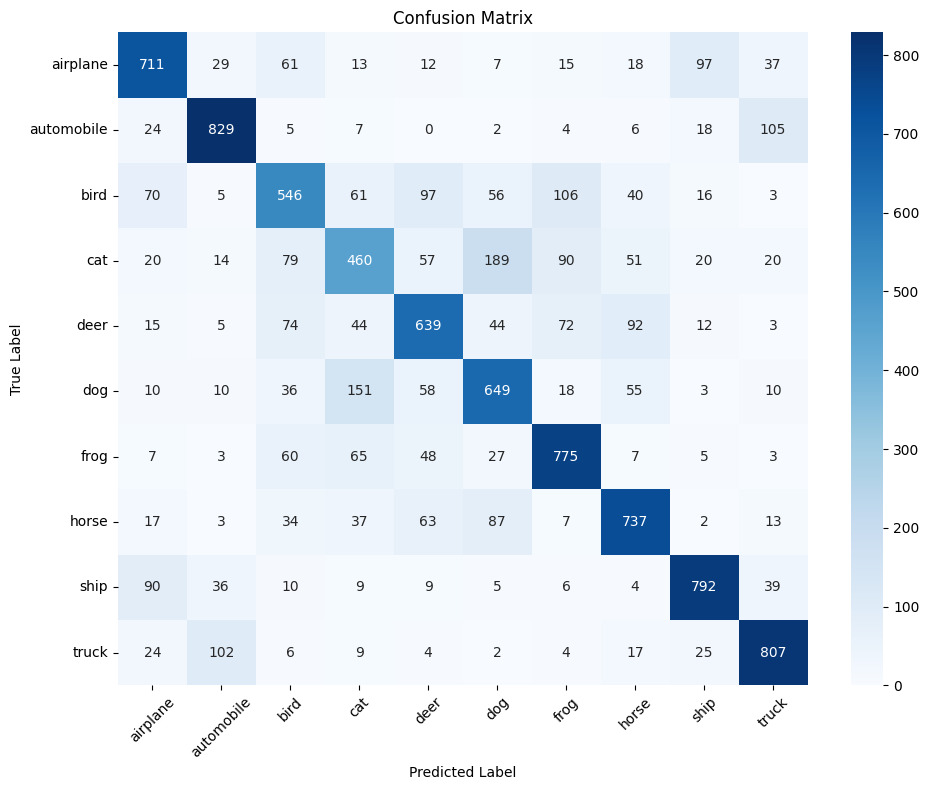

In [10]:
print("\n=== Evaluating Model ===")

# Evaluate on test set
test_loss, test_accuracy, test_top3_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Top-3 Accuracy: {test_top3_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.squeeze(y_test)

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



=== Visualizing Predictions ===


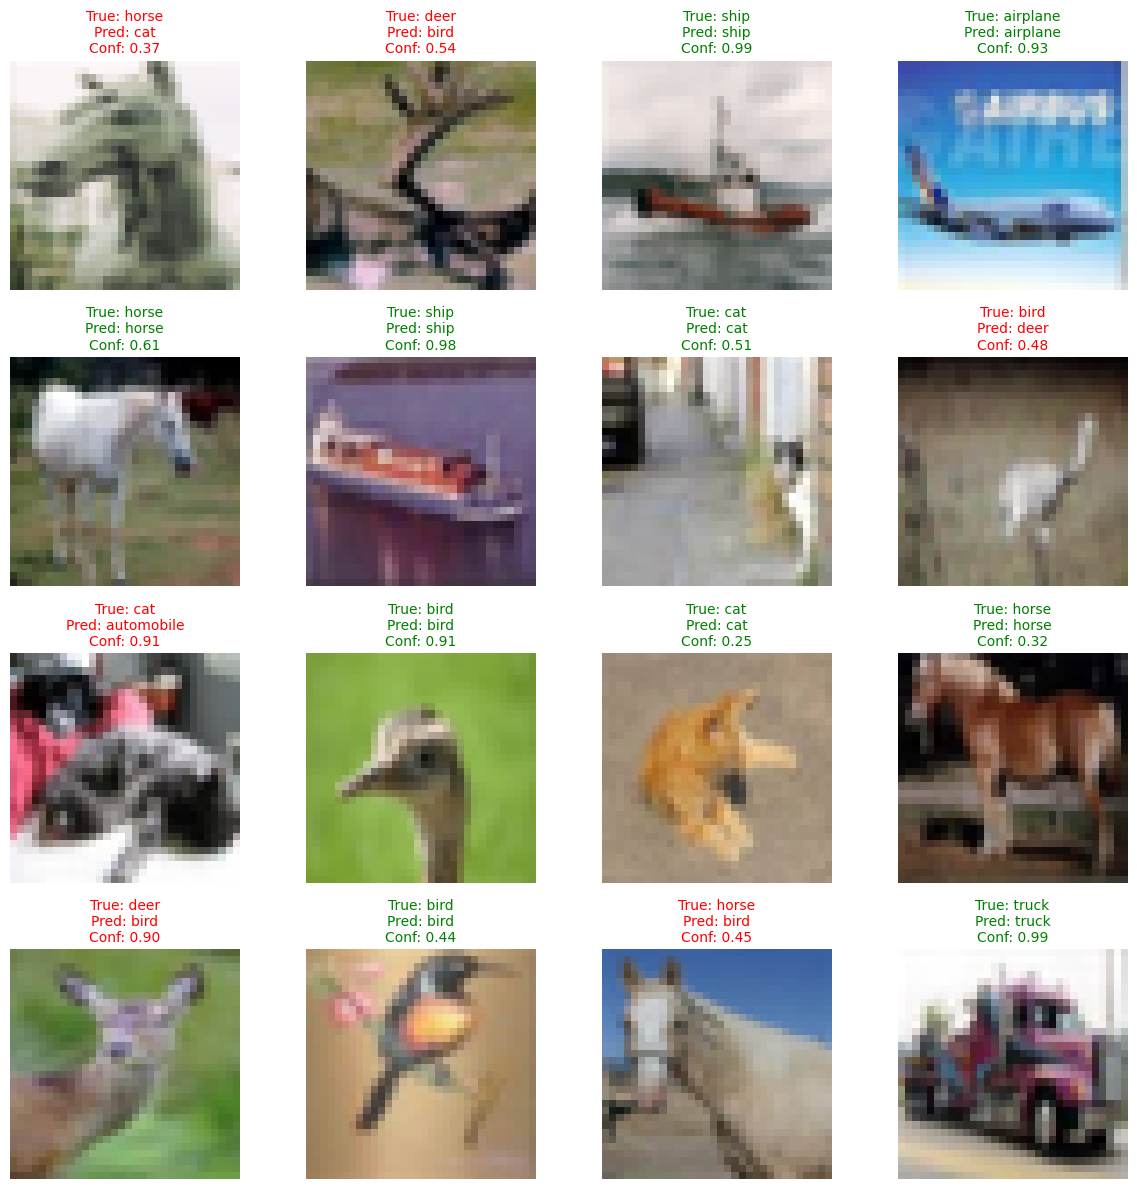

In [11]:
print("\n=== Visualizing Predictions ===")

def plot_predictions(x_test, y_true, y_pred, y_pred_proba, class_names, num_images=16):
    """Plot test images with predictions"""
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()

    # Select random images
    indices = np.random.choice(len(x_test), num_images, replace=False)

    for i, idx in enumerate(indices):
        axes[i].imshow(x_test[idx])

        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        confidence = y_pred_proba[idx].max()

        # Color code: green for correct, red for incorrect
        color = 'green' if y_true[idx] == y_pred[idx] else 'red'

        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}',
                         color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(x_test, y_true, y_pred, y_pred_proba, class_names)


In [ ]:
# Make sure deployment/models exists
os.makedirs("../deployment/models", exist_ok=True)

print("\n=== Saving Model ===")

# Save the final model
model.save('../deployment/models/cifar10_cnn_final_model.keras')
print("Final model saved as 'deployment/models/cifar10_cnn_final_model.keras'")

# Save model in different formats
model.save('../deployment/models/cifar10_cnn_final_model.h5')
print("Final model saved as 'deployment/models/cifar10_cnn_final_model.h5'")

# Save model weights only
model.save_weights('../deployment/models/cifar10_cnn_weights.weights.h5')
print("Model weights saved as 'deployment/models/cifar10_cnn_weights.weights.h5'")

# Save model architecture as JSON
model_json = model.to_json()
with open('../deployment/models/cifar10_cnn_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print("Model architecture saved as 'deployment/models/cifar10_cnn_architecture.json'")

print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

print(f"Model Architecture: CNN with {model.count_params():,} parameters")
print(f"Training Epochs: {len(history.history['loss'])}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Top-3 Accuracy: {test_top3_accuracy:.4f}")

print("\nFiles Created:")
print("- deployment/models/best_cifar10_model.keras (best model during training)")
print("- deployment/models/cifar10_cnn_final_model.keras (final model)")
print("- deployment/models/cifar10_cnn_final_model.h5 (final model in H5 format)")
print("- deployment/models/cifar10_cnn_weights.weights.h5 (model weights)")
print("- deployment/models/cifar10_cnn_architecture.json (model architecture)")

print("\n" + "="*60)
